### Logistic Regression

Logistic regression is a way to turn linear regression into a binary classification. This is accomplished by transforming the linear output in a sigmoid function that scales the output between zero and 1.

Here we will try to predict low birthweight, dataset from 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import requests
import pandas as pd
from sklearn import datasets
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
download_url = 'https://raw.githubusercontent.com/h2oai/h2o-2/master/smalldata/logreg/umass_statdata/lowbwt.dat'

birth_file = requests.get(download_url)
birth_data = birth_file.text.split('\n')[3:]
birth_header = [x for x in birth_data[0].split(' ') if len(x)>=1]

birth_data = [[float(x) for x in y.split(' ') if len(x)>=1] for y in birth_data[1:] if len(y)>=1]
y_vals = np.array([x[1] for x in birth_data])
x_vals = np.array([x[2:9] for x in birth_data])

In [3]:
x_train, x_test, y_train, y_test = train_test_split(x_vals, 
                                                    y_vals, 
                                                    test_size=0.2, 
                                                    random_state=42)

In [4]:
# Logistic regression works better when features are scaled between 0 and 1 
# (min-max scalling)

def normalize_cols(data):
    col_max = data.max(axis=0)
    col_min = data.min(axis=0)
    return (data - col_min)/(col_max - col_min)

x_vals_train = np.nan_to_num(normalize_cols(x_train))
x_vals_test  = np.nan_to_num(normalize_cols(x_test))

y_vals_train = y_train
y_vals_test = y_test

In [5]:
batch_size = 100
x_data = tf.placeholder(shape=[None, 7], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)

A = tf.Variable(tf.random_normal(shape=[7,1]))
b = tf.Variable(tf.random_normal(shape=[1,1]))

model_output = tf.add(tf.matmul(x_data, A), b)

In [6]:
loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=model_output, labels=y_target))
init = tf.global_variables_initializer()

my_opt = tf.train.GradientDescentOptimizer(0.01)
train_step = my_opt.minimize(loss)

In [7]:
prediction = tf.round(tf.sigmoid(model_output))
predictions_correct = tf.cast(tf.equal(prediction, y_target), tf.float32)
accuracy = tf.reduce_mean(predictions_correct)

In [8]:
loss_vec = []
train_acc = []
test_acc = []

with tf.Session() as sess:
    sess.run(init)
    for i in range(1500):
        rand_index = np.random.choice(len(x_vals_train), size=batch_size)
        rand_x = x_vals_train[rand_index]
        rand_y = np.transpose([y_vals_train[rand_index]])
        sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
        temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
        loss_vec.append(temp_loss)
        temp_acc_train = sess.run(accuracy, feed_dict={x_data: x_vals_train, y_target: np.transpose([y_vals_train])})
        train_acc.append(temp_acc_train)
        temp_acc_test = sess.run(accuracy, feed_dict={x_data: x_vals_test, y_target: np.transpose([y_vals_test])})
        test_acc.append(temp_acc_test)

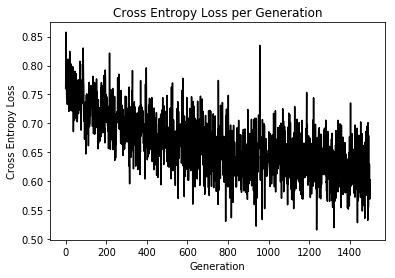

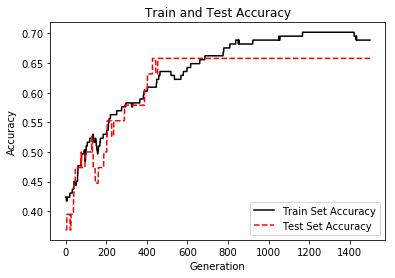

In [9]:
plt.plot(loss_vec, 'k-')
plt.title('Cross Entropy Loss per Generation')
plt.xlabel('Generation')
plt.ylabel('Cross Entropy Loss')
plt.show()

plt.plot(train_acc, 'k-', label='Train Set Accuracy')
plt.plot(test_acc, 'r--', label='Test Set Accuracy')
plt.title('Train and Test Accuracy')
plt.xlabel('Generation')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()